# Week 2 Lecture 2

- Project 1 Review
- Reserve Price Experiment

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Project 1

### Reserve Price

Let's extend our Monte Carlo simulation of the ascending clock auction to allow the seller to choose a reserve price. A reserve price is the minimum price a seller is willing to accept to sell the item. If the final clock price is below the reserve price the seller receives zero revenue. 

For this assignment, assume the following parameters:

- There are 5 buyers
- Buyer values are drawn between 0 and 100 in increments of 5
- Seller reserve prices are allowed to be between 0 and 100 in increments of 5
- The item is considered sold when the clock price is greater than or equal to the reserve price
- The auctions ending rules have now changed. The auction ends when either there are zero buyers bidding at the current clock price, or there is one buyer bidding and the reserve price has been met. 
- In the case of two buyers dropping out at the same price, you can go back to the previous price and randomly choose the winning buyer (if there is a winner).

What reserve price should the seller choose (which price generates the most revenue)? Provide an illustration that supports your result. 

65.29635
[(0, 64.1208), (5, 64.16115), (10, 64.1421), (15, 64.26625), (20, 64.14695), (25, 64.2525), (30, 64.39395), (35, 64.5412), (40, 64.64665), (45, 65.02085), (50, 65.14315), (55, 65.29635), (60, 65.0271), (65, 64.302), (70, 62.70805), (75, 59.8981), (80, 55.08375), (85, 47.84915), (90, 36.97255), (95, 21.53935)]


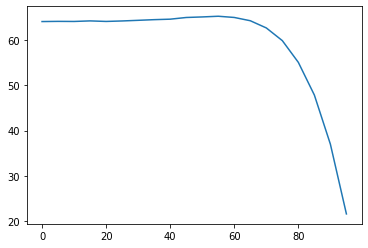

In [4]:
def auction(reserved_price,bidders,buyer_value,repeat):
    total_revenue=[]
    for r in reserved_price:
        revenue=[]
        for i in range(repeat):
            buyer_values=sorted([random.choice(list(range(*buyer_value, 5))) for _ in range(bidders)])
            if buyer_values[-2] >=r:
                    selling_price=(buyer_values[-2]//5)*5
            elif buyer_values[-1]>=r:
                    selling_price=r
            else:
                    selling_price=0
            revenue.append(selling_price)
        total_revenue.append(sum(revenue)/repeat)      
    return(total_revenue)


reserved_price=list(range(0,100, 5))
bidders=5
buyer_value=[0,100]
repeat=100000
estimate_revenue=auction(reserved_price,bidders,buyer_value,repeat)
print(max(estimate_revenue))
print(list(zip(reserved_price, estimate_revenue)))
plt.plot(reserved_price, estimate_revenue)

### Vegas Hotel Problem

You are tasked with forecasting the profits of a Vegas hotel. You come up with the following model:
$pi(t) = (750 + 50t)/(n + 1)$
where $\pi(t)$ is the profit in year $t$, and $n$ is the number of hotels the main competitor owns.

We want to forecast the expected total profit over the next $T$ years, given the following rules:
- You begin in year 1.
- The main competitor currently has no hotels.
- They can only build one hotel at a time.

You can set $T = 10$, $m = 2$. To run Monte Carlo simulations of the profit, you will need to randomly generate the number of hotels the competitor has each year. An example of a valid construction profile is: $\{0,1,1,2,2,2,3,3,3,3\}$. This can be read the following way:

- The competitor begins building on the first year and finishes construction on the second (at that point it counts as a built hotel).
- The competitor starts another immediately after (year 3).
- Finally, they start a third hotel in year 6.

To be valid, the profile must be of length T and increment by at most one every other element (for m = 2). In the above example, the total profit over the 10 years is 3850. Find the expected profit. (Note: I will be lenient with how you sample from the space of possible competitor build profiles. Preferably, each possible profile will be equally likely.)


import scipy.special
import random
import itertools
import scipy
import math

# combinatorial approach
periods = 10
build_time = 2

# list of build_time 0's and a 1 when the hotel is finished
build_value = []
for i in range(build_time - 1):
    build_value.append(0)
build_value.append(1)
idle_value = [0]

num_build_values = list(range(0, periods // build_time + 1))
num_idle_values = [periods - bv * build_time for bv in num_build_values]
num_values = [num_build_values[i] + num_idle_values[i] for i in range(len(num_build_values))]

num_perms_per_build_val = []
for i in range(len(num_build_values)):
    num_perms_per_build_val.append(scipy.special.binom(num_values[i], num_build_values[i]))
    
def profit(period, nbuilds):
    return (750 + 50*period)/(nbuilds + 1)

In [ ]:
trials = 10000
profits = []
for i in range(trials):
    nbuild = random.choices(num_build_values,num_perms_per_build_val)[0]
    nidle = periods - nbuild * build_time
    
    build_schedule = []
    for j in range(nbuild):
        build_schedule.append(build_value)
    for j in range(nidle):
        build_schedule.append(idle_value)
        
    forcast = random.sample(build_schedule,len(build_schedule))
    forcast = list(itertools.chain.from_iterable(forcast))
    
    total = 0
    accum = []
    for v in forcast:
        total += v
        accum.append(total)
        
    total_profit = 0
    for j in range(len(accum)):
        total_profit += profit(j+1, accum[j])
        
    profits.append(total_profit)

In [ ]:
# expected profit
sum(profits)/len(profits)

In [ ]:
# Weighted Sampling Approach
periods = 10
build_time = 2

build_prob = 0.5
trials = 100000
sim_results = []
for i in range(trials):
    forcast_prob = 1
    remaining_build_years = 0
    forcast = []
    for n in range(periods):
        if remaining_build_years == 0 and n + build_time <= periods:
            if random.random() < build_prob:
                remaining_build_years = build_time
                forcast_prob = forcast_prob * build_prob
            else:
                forcast_prob = forcast_prob * (1 - build_prob)
        
        number_new_plants = 0
        if remaining_build_years == 1:
            number_new_plants = 1
        
        remaining_build_years = max(0, remaining_build_years - 1)
        
        forcast.append(number_new_plants)
    
    total = 0
    accum = []
    for v in forcast:
        total += v
        accum.append(total)
        
    total_profit = 0
    for j in range(len(accum)):
        total_profit += profit(j+1, accum[j])
        
    sim_results.append([total_profit, forcast_prob])

In [ ]:
# biased average profit
sum([x[0] for x in sim_results])/trials

In [ ]:
# unbiased expected profit
total_weighted_profit = 0
total_weight = 0
for i in range(trials):
    weight = 1/sim_results[i][1]
    total_weighted_profit += sim_results[i][0] * weight
    total_weight += weight

total_weighted_profit / total_weight

### Conway's Game of Life

Conway's Game of Life is a "game" with a simple set of rules that yields complex results. It works as follows:

- There is an NxN matrix of alive and dead cells, typically by 1's and 0's, respectively
- Each cell has 8 surrounding neighbors. Cells on the edge and the corners wrap around to the other side.
- Each period, the cells update according to the following rules:
	- If a dead cell has exactly 3 alive neighbors next to it, it becomes alive.
	- If an alive cell has either 2 or 3 alive neighbors next to it, it remains alive.
	- If an live cell has fewer than 2 alive neighbors next to it, it dies of loneliness.
	- If an alive cell has more than 3 alive neighbors next to it, it dies of overcrowding. Such is life.
- The cells should be updated independently. So, If I am a cell, and my neighbor is currently dead it must be counted as dead to me this period, even if it turns out it will be alive next period.

Program the Game of Life. Run a test by creating a 4x4 matrix with only the 4 corners alive. The four cells should remain stationary. After the test is working, create a 50x50 matrix with each cell randomly turned on or off. Run it for 100 periods. Plot it using matplotlib.pyplot.matshow. There are many ways to display the 100 matrix plots and I will leave it up to you to find an elegant solution.


In [5]:
# parameters
grid_size = 4

# functions
def random_grid(rows):
    return [[random.choice([0, 1]) for i in range(rows)] for j in range(rows)]

def count_neighbors(grid, cell):
    count = 0
    for i in range(-1,2,1):
        for j in range(-1,2,1):
            if i == 0 and j == 0:
                continue
            count += grid[(cell[0] + i) % len(grid[i])][(cell[1] + j) % len(grid)]
    return count
    
def check_cell(grid, cell):
    neighbor_count = count_neighbors(grid, cell)
    if neighbor_count == 3:
        return 1
    elif neighbor_count == 2:
        return grid[cell[0]][cell[1]]
    else:
        return 0
    
def next_grid(current_grid):
    updated_grid = [[0 for j in range(len(current_grid[i]))] for i in range(len(current_grid))]
    for i in range(len(current_grid)):
        for j in range(len(current_grid[i])):
            updated_grid[i][j] = check_cell(current_grid, [i, j])
    return updated_grid

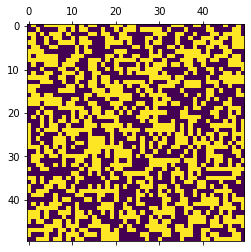

In [35]:
import matplotlib.pyplot as plt
import time

grid = random_grid(50)
fig,ax = plt.subplots(1,1)

def plot_grid(fig, mat, grid):
    
    return fig

def draw_frame(n):
    global grid
    figures = [fig]
    grid = next_grid(grid)
    mat.set_data(grid)
    figures.append(fig)
    return figures

mat = ax.matshow(grid)

In [36]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=40, blit=True)

In [37]:
from IPython.display import HTML
HTML(anim.to_html5_video())